In [1]:
# importing the necessary packages
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

# reading in the csv file
data = pd.read_csv('final_data.csv', index_col=0, header=0)
data.columns

Index(['Unnamed: 0.1', 'year', 'state', 'lp_amount', 'status', 'months',
       'pay_method_ACH', 'pay_method_Other', 'pay_method_credit card',
       'pay_method_paper check', 'region_central', 'region_north_east',
       'region_rocky', 'region_south', 'region_south_east', 'region_west',
       'status_Active', 'status_Decline', 'status_Returned',
       'status_Returned < 90 days', 'status_Returned_90', 'income',
       '18_months'],
      dtype='object')

In [2]:
# Dropping rows that will not be used in the random forest
data = data.drop(['Unnamed: 0.1', 'months', 'state', 'status', 'pay_method_Other',  'lp_amount'], axis = 1)

#Renaming columns so they can be passed in the model
data.columns = ['year', 'lp_amount', 'pay_method_ACH', 'pay_method_credit card',
       'pay_method_paper check', 'region_central', 'region_north_east',
       'region_rocky', 'region_south', 'region_south_east', 'region_west',
       'status_Active', 'status_Decline', 'status_Returned',
       'status_Returned_90', 'income', '18_months']

data.head()

,year,lp_amount,pay_method_ACH,pay_method_credit card,pay_method_paper check,region_central,region_north_east,region_rocky,region_south,region_south_east,region_west,status_Active,status_Decline,status_Returned,status_Returned_90,income,18_months
0,2014.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0.465506,0
1,2015.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0.465506,0
2,2016.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.465506,0
3,2016.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0.465506,0
4,2014.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0.624609,0


In [3]:
# Splitting the data in the X and y variables
X = data.iloc[:,:-1]
Y = data['18_months']

# Splitting the data in training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2019)

In [4]:
# Starting the XGBoost
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Fitting the xg_reg variable
xg_reg.fit(X_train, y_train)

# Creating the y_pred variable
y_pred = xg_reg.predict(X_test)

In [5]:
# Creating the rmse model/variable
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE : %f" % (rmse))

RMSE : 0.270673


In [6]:
# Converting the data set into a matrix
data_matrix = xgb.DMatrix(data=X,label=Y)

/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [7]:
# Setting the hyper-parameters for k-fold cross validation
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

# Building the model as we did in week 10 of Data Mining
cv_results = xgb.cv(dtrain=data_matrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=2019)

In [8]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.468550,0.000153,0.468550,0.000054
1,0.439579,0.002007,0.439622,0.002082
2,0.414606,0.002600,0.414676,0.003084
3,0.393121,0.004232,0.393267,0.004832
4,0.371056,0.001437,0.371116,0.002030


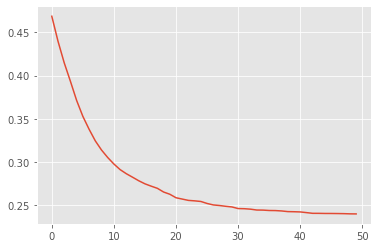

In [9]:
# Plotting the RMSE change over the training of the cross validation model above
plt.style.use('ggplot')

cv_results['test-rmse-mean'].plot()

In [10]:
# Extracting and printing the final boosting round metric.
print((cv_results["test-rmse-mean"]).tail(1))

49    0.239899
Name: test-rmse-mean, dtype: float64


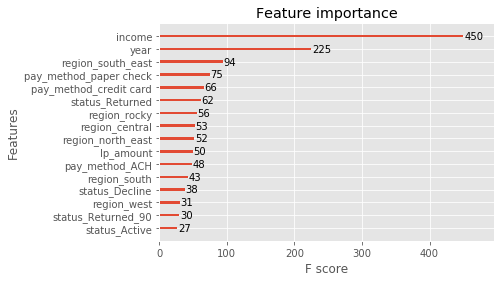

In [11]:
# Using XGBoost's feature importance to come to major conclusions about the datasets
# "Building the bridge" for the company
xgb.plot_importance(xg_reg)
plt.show()